#### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import re
from sklearn.manifold import TSNE
from bokeh.io import output_notebook, show
import matplotlib.colors as mcolors
import matplotlib
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.svm import SVR
from wordcloud import WordCloud

In [2]:
#!pip install pyLDAvis==2.1.2 --user

In [3]:
import pyLDAvis
import pyLDAvis.gensim as gensimvis
pyLDAvis.enable_notebook()

In [4]:
#!pip install gensim
import gensim
from gensim import corpora
from gensim.models import CoherenceModel

C:\Users\Administrator\anaconda3\lib\site-packages\scipy\sparse\sparsetools.py:21: DeprecationWarning: `scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.
  _deprecated()


In [5]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [6]:
#!pip install --upgrade ipykernel

In [7]:
#!pip install nltk
import nltk
from nltk.util import ngrams

In [8]:
#nltk.download('vader_lexicon')

#### Functions

In [9]:
def preProcessLines(lines):  
    line_index=0
    parent_line_index=0
    final_lines=[]
    cnt=0
    for line in lines:
        if re.match('Parent.*',line) :
            #print(line)
            parent_line_index=line_index 
            cnt=0
        elif re.match('Moderator.*',line) or  re.match('Moderator.*',line):
            cnt=0
        elif line_index-1==parent_line_index:
            final_lines.append(line)
            cnt=1
            #print(line)
        elif cnt==1:
            final_lines.append(line)
            #print(line)
        else:
            continue
        line_index=line_index+1   
    return final_lines

In [10]:
def preprocessText(text):
    tokens=tokenize(text)
    final_tokens = [token for token in tokens if token not in custom_stop]
    return ' '.join(word for word in final_tokens)

- Tokenize

In [11]:
def tokenize(text):
    lda_tokens=[]
    text=text.lower()
    tokens=text.split()
    for token in tokens:
        if re.match('\(silence\)',token):
            continue
        elif re.match('\[inaudible',token):
            continue
        elif re.match('\[crosstalk',token):
            continue
        elif re.match('\[Administrator',token):
            continue
        elif re.match('\d+',token):
            continue
        elif re.match('\$\d+',token):
            continue
        elif re.match('i.?m',token):
            continue
        elif re.match('you.?re',token):
            continue
        elif re.match('don.?t',token):
            continue
        elif re.match('didn.?t',token):
            continue
        elif re.match('i.?ll',token):
            continue
        elif re.match('we.?ll',token):
            continue
        elif re.match('we.?re',token):
            continue
        elif re.match('that.?s',token):
            continue
        elif re.match('can.?t',token):
            continue
        elif re.match('they.?re',token):
            continue
        elif re.match('i.?ve',token):
            continue
        elif re.match('he.?s',token):
            continue 
        elif re.match('we.?ve',token):
            continue
        elif re.match('everyone.?s',token):
            continue
        elif re.match('they.?ll',token):
            continue
        elif re.match('there.?s',token):
            continue
        elif re.match('child.?s',token):
            continue
        elif re.match('children.?s',token):
            continue
        elif re.match('she.?s',token):
            continue
        elif re.match('he.?s',token):
            continue
        elif re.match('it.?s',token):
            continue
        elif re.match('today.?s',token):
            continue
        elif re.match('does.?nt',token):
            continue
        elif re.match('you.?ve',token):
            continue
        elif re.match('would.?nt',token):
            continue
        elif re.match('here.?s',token):
            continue
        else:
            token=token.replace('?','')
            token=token.replace('.','')
            token=token.replace(':','')
            token=token.replace(',','')
            token=token.replace('/s+','')
            lda_tokens.append(token)
    return lda_tokens

- Remove stop words

In [12]:
#en_stop=set(nltk.corpus.stopwords.words('english'))
#en_stop_list=list(en_stop)
#custom_stop_list=['hi','hello','please','the','and','i','parent','child','okay','if','you','have','it','would','be','for','said','thank','you','yes','no','moderator','administrator','see','who','in','just','zoom','now','daughter','son','yeah','really','us','say','go','bit','going','things','still','think','get','got','bye','saw','noticing','there','go','think','also','take', 'way','yeah','anything', 'you','could','bye','saw','noticing','now','tell','getting','sounds','actually','know','time','definitely','call','me','even','really','us','get','got','me','able','told','guessing','guess','like','said','let','thanks','thank','something','question','conversation','joined','used','use','later','lot','talk','point','day','place','sure','minutes','early','anyone','started','front','kids','attached','parents','one','two','little','everyone','looking','full','put','using','last','end','afternoon','starting','ways','way','always','right','seems','much','there','maybe','another','sorry','guys','literally','either','else','seen','taken','sharing','understand','pandemic','today','basically','year','want','card','fact','start','join','took','says','gave','taking','mean','recording','meeting','may','saying','every','june']
custom_stop_list=['hi','hello','they','to','want','please','that','or','and','can','his','have','has','had','having','looking','look','her','him','how','doing','done','he','myself','our','while','mean','meaning','my','than','from','other','your','these','some','was','when','when','why','what','their','them','there','this','on','as','of','we','with','because','do','at','had','but','them','are','is','the','more','so','remove','removed','and','he','she','does','i','it','parent','world','going','bleep','get','got','google','googling','held','happening','happen','reach','nobody','still','getting','any','ask','asks','know','think','need','take','go','give','gave','child','pen','children','okay','may','if','you','have','it','would','be','for','said','thank','you','yes','no','moderator','administrator','see','who','in','just','zoom','now','daughter','son','yeah','really','bit','bye','there','also','yeah','new','anything', 'you','could','got','bye','now','sounds','actually','definitely','call','me','even','really','us','me','able','guessing','guess','like','said','let','thanks','thank','something','question','conversation','joined','later','lot','talk','point','day','place','sure','minutes','early','anyone','front','kids','attached','jersey','parents','one','two','everyone','afternoon','bye-bye','way','always','right','seems','much','there','another','sorry','guys','literally','either','else','pandemic','today','basically','year','card','fact','join','says','mean','recording','meeting','saying','every','june','paper','pencil','receive','wednesday','log','healthy','brain','network','gift','amazon','compensation','email','end','lookout','regards','say','says','saying','why', 'give', 'an', 'where', 'goes', 'that','booked','book','into','about','up','after','someone','such','want','been','wanted', 'by','did', 'today', 'find','very','tuesday','know','knew','which','here', 'wednesday','gotten','then','though','will','thursday','anymore','september','being','first']
custom_stop=custom_stop_list

- Prepare Text for LDA (Tokenize, Remove Stop words)

In [13]:
def prepareTextForLDAUnigram(text):
    tokens=tokenize(text)
    final_tokens=[]
    tokens = [token for token in tokens if token not in custom_stop]
    unique_tokens=list(set(tokens))
    for token in unique_tokens:
        if(len(token)>1):
            final_tokens.append(token)
    return final_tokens

In [14]:
def prepareTextForLDABigram(text):
    tokens=tokenize(text)
    final_tokens=[]
    bigram_tokens=[]
    tokens = [token for token in tokens if token not in custom_stop]
    for token in tokens:
        if(len(token)>1):
            final_tokens.append(token)
    bigrams = list(ngrams(final_tokens, 2)) 
    for bigram in bigrams:
        bigram_tokens.append(bigram[0]+"_"+bigram[1])
    return bigram_tokens

- Topic Modeling using unigrams/bigrams

In [15]:
def getLineUnigramTokens(final_lines):
    unigram_tokens=[]
    for line in final_lines:
        if len(prepareTextForLDAUnigram(line))>0:
            unigram_tokens.append(prepareTextForLDAUnigram(line))
    return unigram_tokens    

In [16]:
def getLineBigramTokens(final_lines):
    bigram_tokens=[]
    for line in final_lines:
        if len(prepareTextForLDABigram(line))>0:
            bigram_tokens.append(prepareTextForLDABigram(line))
    return bigram_tokens    

In [17]:
def getLDAModel(tokens,id2word,corpus,num_topics):
    # Build LDA model
    lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                               id2word=id2word,
                                               num_topics=num_topics, 
                                               random_state=42,
                                               update_every=1,
                                               chunksize=10,
                                               per_word_topics=True)
    return lda_model

- Clustering

In [18]:
def getTopicClusters(lda_model, corpus):
    # Getting topic weights
    topic_weights = []
    for i, row_list in enumerate(lda_model[corpus]):
        topic_weights.append([w for i, w in row_list[0]])
    # Generating an array of optic weights    
    arr = pd.DataFrame(topic_weights).fillna(0).values
    # Dominant topic in each document
    topic_num = np.argmax(arr, axis=1)
    # tSNE Dimension Reduction
    tsne_model = TSNE(n_components=2, verbose=1, random_state=0, angle=.99, init='pca')
    tsne_lda = tsne_model.fit_transform(arr)
    # Plotting the Topic Clusters with Bokeh
    output_notebook()
    n_topics = 4
    mycolors = np.array([color for name, color in mcolors.TABLEAU_COLORS.items()])
    #plot = figure()
    plt.scatter(x=tsne_lda[:,0], y=tsne_lda[:,1], color=mycolors[topic_num])
    plt.show()

- Sentiment Analysis

In [19]:
def getSentimentScores(row):
    return sid.polarity_scores(row)    

##### Social Group1

In [20]:
filename='Data/FocusGroups/TXT_Samples/Social_Group1.txt'
with open(filename, 'r') as file:
    #data = file.read().replace('\n', '')
    lines = file.read().splitlines()
final_lines=preProcessLines(lines) 

In [21]:
bigram_tokens=getLineBigramTokens(final_lines)
# Create Dictionary
id2word = corpora.Dictionary(bigram_tokens)
# Create Corpus: Term Document Frequency
corpus = [id2word.doc2bow(text) for text in bigram_tokens]
# Build LDA model
num_topics=5
lda_model = getLDAModel(bigram_tokens,id2word,corpus,num_topics)
print(lda_model.print_topics())
#1-Life changes
#4-Online Classes
#3-Good use of technology

#2-Video games & Social media
#3-Good use of technology
#2-Going back to normal


#2-Going back to normal
#3-Social media


[(0, '0.024*"full_responsibility" + 0.024*"enough_sleep" + 0.024*"learning_accounting" + 0.024*"great_many" + 0.024*"changes_technology\'s" + 0.024*"good_things" + 0.024*"make_changes" + 0.024*"excuse_blame" + 0.024*"accounting_screen" + 0.024*"blame_dedicate"'), (1, '0.007*"locked_down" + 0.005*"open_back" + 0.004*"back_left" + 0.004*"left_house" + 0.004*"mine_ran" + 0.004*"phone_mine" + 0.004*"ran_away" + 0.004*"took_phone" + 0.004*"away_back" + 0.004*"same_sense"'), (2, '0.005*"all_technology" + 0.004*"phone_flung" + 0.004*"taken_phone" + 0.004*"ignore_lost" + 0.004*"lost_drug" + 0.004*"money_not" + 0.004*"not_paying" + 0.004*"out_door" + 0.004*"paying_ignore" + 0.004*"door_told"'), (3, '0.006*"middle_night" + 0.006*"several_months" + 0.006*"source_conflict" + 0.005*"not_communicating" + 0.005*"text_only" + 0.005*"only_text" + 0.005*"huge_distraction" + 0.004*"all_work" + 0.004*"missing_all" + 0.003*"hate_not"'), (4, '0.018*"social_media" + 0.006*"all_work" + 0.005*"doesn\'t_speak" 

In [22]:
#!pip install WordCloud

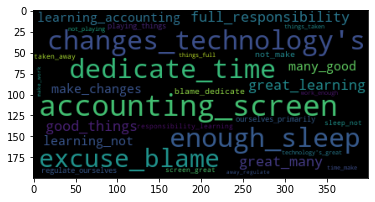

In [23]:
#Topic 0
plt.imshow(WordCloud().fit_words(dict(lda_model.show_topic(0, 200))))


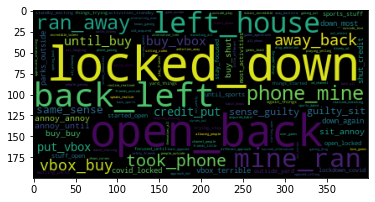

In [24]:
#Topic 1
plt.imshow(WordCloud().fit_words(dict(lda_model.show_topic(1, 200))))

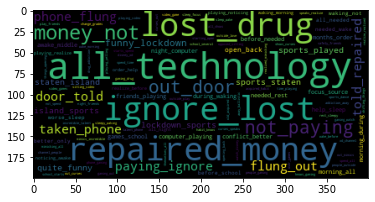

In [25]:
#Topic 2
plt.imshow(WordCloud().fit_words(dict(lda_model.show_topic(2, 200))))

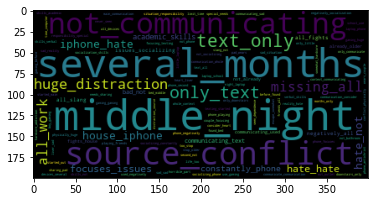

In [26]:
#Topic 3
plt.imshow(WordCloud().fit_words(dict(lda_model.show_topic(3, 200))))

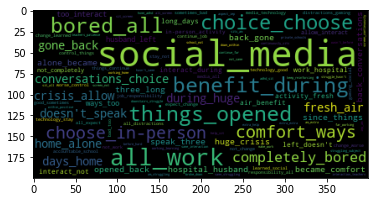

In [27]:
#Topic 4
plt.imshow(WordCloud().fit_words(dict(lda_model.show_topic(4, 200))))

In [28]:
coherence_model_lda=CoherenceModel(model=lda_model, texts=bigram_tokens, dictionary=id2word, coherence='c_v')
coherence_model_lda.get_coherence()

0.5815293820083226

[t-SNE] Computing 60 nearest neighbors...
[t-SNE] Indexed 61 samples in 0.000s...
[t-SNE] Computed neighbors for 61 samples in 0.000s...
[t-SNE] Computed conditional probabilities for sample 61 / 61
[t-SNE] Mean sigma: 0.587838
[t-SNE] KL divergence after 250 iterations with early exaggeration: 51.268200
[t-SNE] KL divergence after 1000 iterations: 0.315540


Loading BokehJS ...

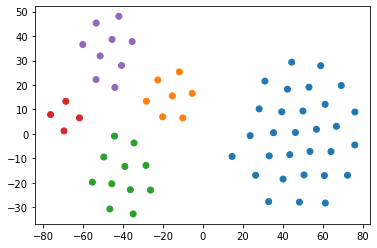

In [29]:
getTopicClusters(lda_model, corpus)

In [30]:
vis = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary=lda_model.id2word)
vis

C:\Users\Administrator\AppData\Roaming\Python\Python38\site-packages\pyLDAvis\_prepare.py:228: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info  = pd.DataFrame({'saliency': saliency, 'Term': vocab, \


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.080314  0.120724       1        1  29.892029
1     -0.064659 -0.063901       2        1  23.302409
4     -0.064428 -0.000928       3        1  22.657722
2     -0.077356 -0.059136       4        1  16.588158
0      0.286757  0.003242       5        1   7.559681, topic_info=                         Term      Freq     Total Category  logprob  loglift
136                 make_work  2.000000  2.000000  Default  30.0000  30.0000
1044              work_enough  2.000000  2.000000  Default  29.0000  29.0000
1029             make_changes  2.000000  2.000000  Default  28.0000  28.0000
1016        accounting_screen  2.000000  2.000000  Default  27.0000  27.0000
1017            away_regulate  2.000000  2.000000  Default  26.0000  26.0000
...                       ...       ...       ...      ...      ...      ...
1036  responsibility_learning  1.978064  2.485122   Topic5  -3.7184   2.3541
1035       regulate_ourselves  1.978064  2.485122   Topic5  -3.7184   2.3541
1034           playing_things  1.978064  2.485122   Topic5  -3.7184   2.3541
1033      ourselves_primarily  1.978064  2.485122   Topic5  -3.7184   2.3541
136                 make_work  1.970044  2.681154   Topic5  -3.7225   2.2741

[241 rows x 6 columns], token_table=      Topic      Freq                Term
term                                     
656       1  0.832771     academic_skills
1016      5  0.804790   accounting_screen
963       2  0.699505  activities_standby
925       3  0.625957      activity_fresh
964       2  0.699505        again_things
...     ...       ...                 ...
961       3  0.625957            ways_too
1044      5  0.804790         work_enough
962       3  0.625957       work_hospital
819       2  0.744039         worse_sleep
985       2  0.699505         yard_things

[200 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 2, 5, 3, 1])

In [31]:
df=pd.DataFrame(final_lines,columns=['final_lines'])
df['clean_text']=df['final_lines'].apply(preprocessText)
sid = SentimentIntensityAnalyzer()
df['scores'] = df['clean_text'].apply(lambda review: sid.polarity_scores(review))
df['compound']  = df['scores'].apply(lambda score_dict: score_dict['compound'])
final=df.query("compound!=0")
final['comp_score'] = final['compound'].apply(lambda c: 'pos' if c >=0 else 'neg')
final['is_positive'] = final['comp_score'].apply(lambda c: 1 if c =='pos' else 0)

C:\Users\ADMINI~1\AppData\Local\Temp\2/ipykernel_5924/2397249490.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final['comp_score'] = final['compound'].apply(lambda c: 'pos' if c >=0 else 'neg')
C:\Users\ADMINI~1\AppData\Local\Temp\2/ipykernel_5924/2397249490.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final['is_positive'] = final['comp_score'].apply(lambda c: 1 if c =='pos' else 0)


<AxesSubplot:ylabel='Frequency'>

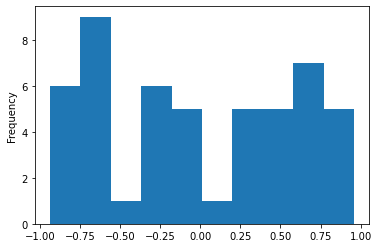

In [32]:
final['compound'].plot(kind = 'hist')

<AxesSubplot:>

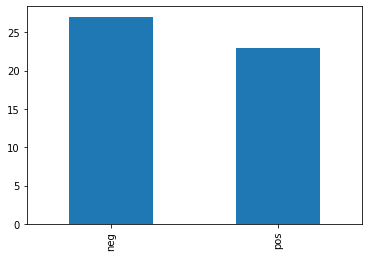

In [33]:
final['comp_score'].value_counts().plot(kind = 'bar')

##### Social Group2

In [34]:
filename='Data/FocusGroups/TXT_Samples/Social_Group2.txt'
with open(filename, 'r') as file:
    #data = file.read().replace('\n', '')
    lines = file.read().splitlines()
final_lines=preProcessLines(lines) 

In [35]:
bigram_tokens=getLineBigramTokens(final_lines)
# Create Dictionary
id2word = corpora.Dictionary(bigram_tokens)
# Create Corpus: Term Document Frequency
corpus = [id2word.doc2bow(text) for text in bigram_tokens]
# Build LDA model
lda_model = getLDAModel(bigram_tokens,id2word,corpus,num_topics)
print(lda_model.print_topics())
#1-Technology use
#2-Going back to normal
#3-Social media
#4-Online Classes

[(0, '0.004*"phone"_"why" + 0.004*""give_phone"" + 0.003*"face_face" + 0.003*"figure_out" + 0.003*"put_down" + 0.003*""why_happened"" + 0.003*"feel_addicted" + 0.003*"telephone_"give" + 0.003*"relate_feel" + 0.003*"addicted_telephone"'), (1, '0.013*"all_time" + 0.007*"causing_problems" + 0.006*"time_all" + 0.005*"spending_all" + 0.005*"time_room" + 0.004*"intense_pressure" + 0.004*"little_thing" + 0.004*"certain_time" + 0.003*"not_foreseen" + 0.003*"obsession_feel"'), (2, '0.009*"put_phone" + 0.006*"phone_down" + 0.006*"teach_careful" + 0.006*"things_yet" + 0.006*"themselves_bigger" + 0.006*"share_all" + 0.006*"newspaper_share" + 0.006*"deal_things" + 0.006*"careful_dealing" + 0.006*"all_themselves"'), (3, '0.005*"not_allow" + 0.004*"friday_night" + 0.004*"night_saturday" + 0.004*"screen_time" + 0.004*"good_social" + 0.003*"high_school" + 0.003*"back_school" + 0.002*"stay_out" + 0.002*"society\'s_honestly" + 0.002*"surgery_filters"'), (4, '0.025*"social_media" + 0.004*"teach_careful" +

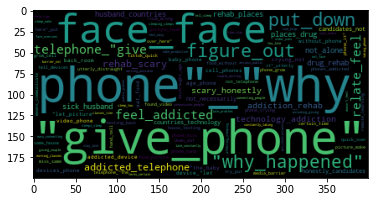

In [36]:
#Topic 0
plt.imshow(WordCloud().fit_words(dict(lda_model.show_topic(0, 200))))

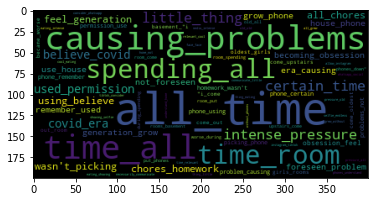

In [37]:
#Topic 1
plt.imshow(WordCloud().fit_words(dict(lda_model.show_topic(1, 200))))

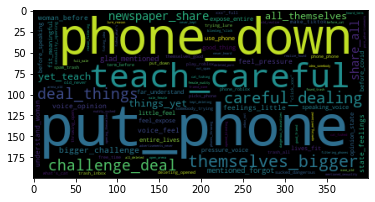

In [38]:
#Topic 2
plt.imshow(WordCloud().fit_words(dict(lda_model.show_topic(2, 200))))

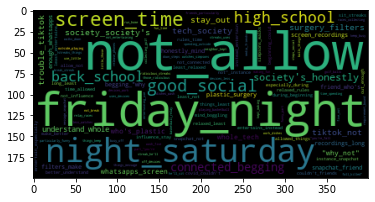

In [39]:
#Topic 3
plt.imshow(WordCloud().fit_words(dict(lda_model.show_topic(3, 200))))

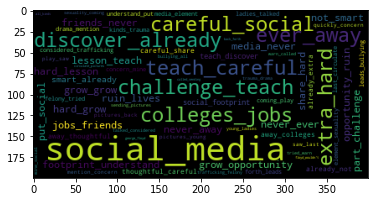

In [40]:
#Topic 4
plt.imshow(WordCloud().fit_words(dict(lda_model.show_topic(4, 200))))

In [41]:
coherence_model_lda=CoherenceModel(model=lda_model, texts=bigram_tokens, dictionary=id2word, coherence='c_v')
coherence_model_lda.get_coherence()

0.546305497850064

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 96 samples in 0.000s...
[t-SNE] Computed neighbors for 96 samples in 0.002s...
[t-SNE] Computed conditional probabilities for sample 96 / 96
[t-SNE] Mean sigma: 0.028093
[t-SNE] KL divergence after 250 iterations with early exaggeration: 54.189758
[t-SNE] KL divergence after 950 iterations: 0.039178


Loading BokehJS ...

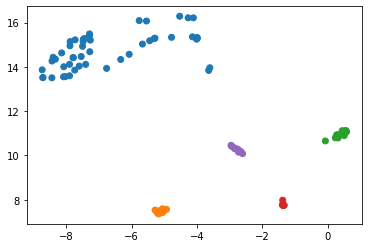

In [42]:
getTopicClusters(lda_model, corpus)

In [43]:
vis = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary=lda_model.id2word)
vis

C:\Users\Administrator\AppData\Roaming\Python\Python38\site-packages\pyLDAvis\_prepare.py:228: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info  = pd.DataFrame({'saliency': saliency, 'Term': vocab, \


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.083045 -0.117200       1        1  23.709416
0     -0.068468  0.059511       2        1  21.206262
4      0.165870 -0.037222       3        1  20.578441
2      0.043136  0.059351       4        1  18.837123
1     -0.057493  0.035560       5        1  15.668758, topic_info=                  Term       Freq      Total Category  logprob  loglift
1001      social_media  10.000000  10.000000  Default  30.0000  30.0000
471           all_time   4.000000   4.000000  Default  29.0000  29.0000
1204         put_phone   3.000000   3.000000  Default  28.0000  28.0000
1672  causing_problems   2.000000   2.000000  Default  27.0000  27.0000
1196        phone_down   2.000000   2.000000  Default  26.0000  26.0000
...                ...        ...        ...      ...      ...      ...
1684    permission_use   1.077591   1.466529   Topic5  -5.6811   1.5453
1692         use_house   1.077591   1.466529   Topic5  -5.6811   1.5453
1691     remember_used   1.077591   1.466529   Topic5  -5.6811   1.5453
1690      problems_not   1.077591   1.466529   Topic5  -5.6811   1.5453
1495      certain_time   1.362401   2.543590   Topic5  -5.4466   1.2292

[249 rows x 6 columns], token_table=      Topic      Freq            Term
term                                 
1620      2  0.738535    "give_phone"
1620      4  0.369268    "give_phone"
1627      2  0.633783    "let_picture
1628      2  0.633783       "the_baby
1621      2  0.601925  "why_happened"
...     ...       ...             ...
1377      1  0.701679   who's_plastic
1378      1  0.701679      whole_tech
1668      2  0.633783   without_phone
1901      4  0.793367    woman_before
1830      4  0.778364       yet_teach

[224 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 1, 5, 3, 2])

In [44]:
df=pd.DataFrame(final_lines,columns=['final_lines'])
df['clean_text']=df['final_lines'].apply(preprocessText)
sid = SentimentIntensityAnalyzer()
df['scores'] = df['clean_text'].apply(lambda review: sid.polarity_scores(review))
df['compound']  = df['scores'].apply(lambda score_dict: score_dict['compound'])
final=df.query("compound!=0")
final['comp_score'] = final['compound'].apply(lambda c: 'pos' if c >=0 else 'neg')
final['is_positive'] = final['comp_score'].apply(lambda c: 1 if c =='pos' else 0)

C:\Users\ADMINI~1\AppData\Local\Temp\2/ipykernel_5924/2397249490.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final['comp_score'] = final['compound'].apply(lambda c: 'pos' if c >=0 else 'neg')
C:\Users\ADMINI~1\AppData\Local\Temp\2/ipykernel_5924/2397249490.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final['is_positive'] = final['comp_score'].apply(lambda c: 1 if c =='pos' else 0)


<AxesSubplot:ylabel='Frequency'>

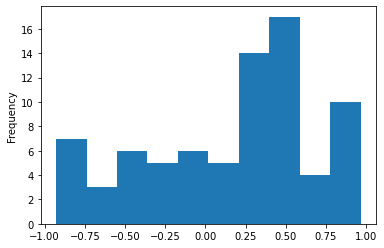

In [45]:
final['compound'].plot(kind = 'hist')

<AxesSubplot:>

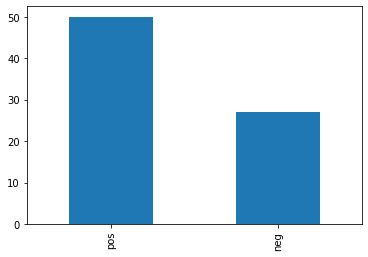

In [46]:
final['comp_score'].value_counts().plot(kind = 'bar')

##### Social Group3

In [47]:
filename='Data/FocusGroups/TXT_Samples/Social_Group3.txt'
with open(filename, 'r') as file:
    #data = file.read().replace('\n', '')
    lines = file.read().splitlines()
final_lines=preProcessLines(lines) 

In [48]:
bigram_tokens=getLineBigramTokens(final_lines)
# Create Dictionary
id2word = corpora.Dictionary(bigram_tokens)
# Create Corpus: Term Document Frequency
corpus = [id2word.doc2bow(text) for text in bigram_tokens]
# Build LDA model
lda_model = getLDAModel(bigram_tokens,id2word,corpus,num_topics)
print(lda_model.print_topics())
#1-Technology use
#2-Going back to normal
#3-Social media
#4-Online Classes

[(0, '0.010*"back_school" + 0.004*"different_things" + 0.004*"social_interactions" + 0.004*"pajamas_all" + 0.004*"workshops_things" + 0.003*"went_school" + 0.003*"especially_girls" + 0.002*"time_room" + 0.002*"spending_time" + 0.002*"kind_help"'), (1, '0.016*"town_hall" + 0.011*"focus_groups" + 0.008*"internet_usage" + 0.007*"test_anxiety" + 0.005*"social_anxiety" + 0.004*"transition_back" + 0.004*"heard_things" + 0.004*"problematic_internet" + 0.004*"different_resources" + 0.003*"school_all"'), (2, '0.015*"social_media" + 0.004*"figure_out" + 0.004*"person_person" + 0.002*"limit_socialization" + 0.002*"reopening_limit" + 0.002*"notice_students" + 0.002*"room_separate" + 0.002*"interesting_classrooms" + 0.002*"class_those" + 0.002*"desks_chat"'), (3, '0.005*"not_available" + 0.005*"things_struggling" + 0.003*"free_age" + 0.003*"free"_free" + 0.003*"everybody_wants" + 0.003*"everybody_"oh" + 0.003*"doctor_doctor" + 0.003*"doctor_"well" + 0.003*"hard_everybody" + 0.003*"depression_anxiet

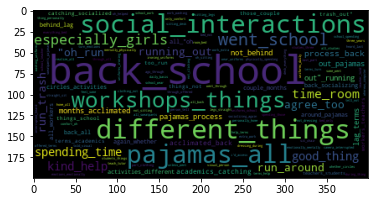

In [49]:
#Topic 0
plt.imshow(WordCloud().fit_words(dict(lda_model.show_topic(0, 200))))


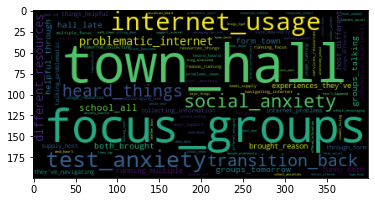

In [50]:
#Topic 1
plt.imshow(WordCloud().fit_words(dict(lda_model.show_topic(1, 200))))


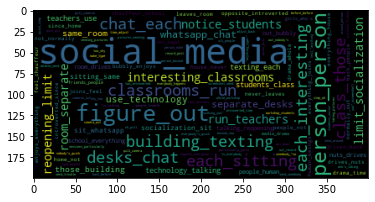

In [51]:
#Topic 2
plt.imshow(WordCloud().fit_words(dict(lda_model.show_topic(2, 200))))


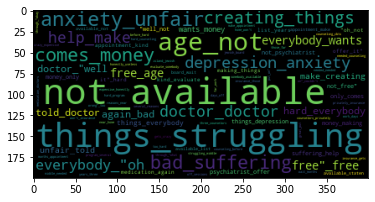

In [52]:
#Topic 3
plt.imshow(WordCloud().fit_words(dict(lda_model.show_topic(3, 200))))


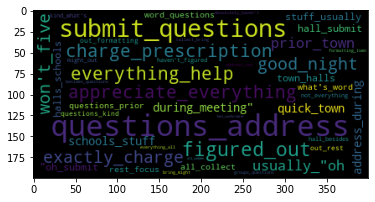

In [53]:
#Topic 4
plt.imshow(WordCloud().fit_words(dict(lda_model.show_topic(4, 200))))


In [54]:
coherence_model_lda=CoherenceModel(model=lda_model, texts=bigram_tokens, dictionary=id2word, coherence='c_v')
coherence_model_lda.get_coherence()

0.625693583963397

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 106 samples in 0.000s...
[t-SNE] Computed neighbors for 106 samples in 0.000s...
[t-SNE] Computed conditional probabilities for sample 106 / 106
[t-SNE] Mean sigma: 0.012507
[t-SNE] KL divergence after 250 iterations with early exaggeration: 51.122238
[t-SNE] KL divergence after 1000 iterations: 0.028760


Loading BokehJS ...

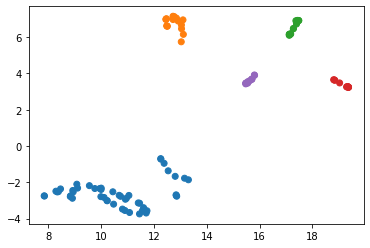

In [55]:
getTopicClusters(lda_model, corpus)

In [56]:
vis = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary=lda_model.id2word)
vis

C:\Users\Administrator\AppData\Roaming\Python\Python38\site-packages\pyLDAvis\_prepare.py:228: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info  = pd.DataFrame({'saliency': saliency, 'Term': vocab, \


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.020536 -0.064852       1        1  30.239551
1     -0.072232  0.106490       2        1  22.462358
3      0.161276  0.017190       3        1  16.827345
4     -0.060343 -0.059557       4        1  15.303791
2     -0.008166  0.000729       5        1  15.166955, topic_info=                   Term      Freq     Total Category  logprob  loglift
1828  questions_address  7.000000  7.000000  Default  30.0000  30.0000
1472          town_hall  7.000000  7.000000  Default  29.0000  29.0000
1071       social_media  5.000000  5.000000  Default  28.0000  28.0000
1833   submit_questions  5.000000  5.000000  Default  27.0000  27.0000
1445       focus_groups  5.000000  5.000000  Default  26.0000  26.0000
...                 ...       ...       ...      ...      ...      ...
1150     feel_chauffeur  0.584711  1.025538   Topic5  -6.2282   1.3242
1152        house_never  0.584711  1.025538   Topic5  -6.2282   1.3242
1148   everything_house  0.584711  1.025538   Topic5  -6.2282   1.3242
1160        nuts_drives  0.584711  1.025538   Topic5  -6.2282   1.3242
1162         out_bubbly  0.584711  1.025538   Topic5  -6.2282   1.3242

[229 rows x 6 columns], token_table=      Topic      Freq                Term
term                                     
1773      3  0.717965             "oh_not
1347      1  0.652788             "oh_run
1822      4  0.683945          "oh_submit
1774      3  0.717965           "well_not
1836      4  0.679683  absolutely_haven't
...     ...       ...                 ...
1384      1  0.652788     whether_circles
1819      4  0.695857          won't_five
1855      4  0.679683      word_questions
1385      1  0.652788    workers_teachers
1403      1  0.797776    workshops_things

[200 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 4, 5, 3])

In [57]:
df=pd.DataFrame(final_lines,columns=['final_lines'])
df['clean_text']=df['final_lines'].apply(preprocessText)
sid = SentimentIntensityAnalyzer()
df['scores'] = df['clean_text'].apply(lambda review: sid.polarity_scores(review))
df['compound']  = df['scores'].apply(lambda score_dict: score_dict['compound'])
final=df.query("compound!=0")
final['comp_score'] = final['compound'].apply(lambda c: 'pos' if c >=0 else 'neg')
final['is_positive'] = final['comp_score'].apply(lambda c: 1 if c =='pos' else 0)

C:\Users\ADMINI~1\AppData\Local\Temp\2/ipykernel_5924/2397249490.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final['comp_score'] = final['compound'].apply(lambda c: 'pos' if c >=0 else 'neg')
C:\Users\ADMINI~1\AppData\Local\Temp\2/ipykernel_5924/2397249490.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final['is_positive'] = final['comp_score'].apply(lambda c: 1 if c =='pos' else 0)


<AxesSubplot:ylabel='Frequency'>

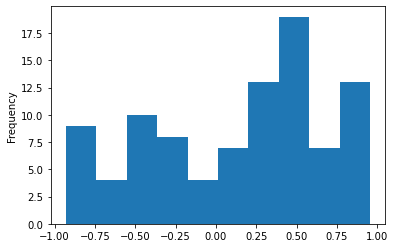

In [58]:
final['compound'].plot(kind = 'hist')

<AxesSubplot:>

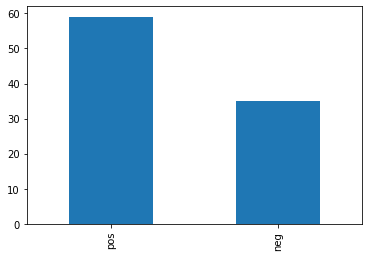

In [59]:
final['comp_score'].value_counts().plot(kind = 'bar')

##### Social Group4

In [60]:
filename='Data/FocusGroups/TXT_Samples/Social_Group4.txt'
with open(filename, 'r') as file:
    #data = file.read().replace('\n', '')
    lines = file.read().splitlines()
final_lines=preProcessLines(lines) 

In [61]:
bigram_tokens=getLineBigramTokens(final_lines)
# Create Dictionary
id2word = corpora.Dictionary(bigram_tokens)
# Create Corpus: Term Document Frequency
corpus = [id2word.doc2bow(text) for text in bigram_tokens]
# Build LDA model
lda_model = getLDAModel(bigram_tokens,id2word,corpus,num_topics)
print(lda_model.print_topics())
#1-Technology use
#2-Going back to normal
#3-Social media
#4-Online Classes

[(0, '0.006*"figure_out" + 0.005*"internet_usage" + 0.005*"might_struggle" + 0.003*"good_schedule" + 0.003*"disorder_high" + 0.003*"functioning_anxiety" + 0.003*"gets_thrown" + 0.003*"difficult_figure" + 0.003*"hab_all" + 0.003*"long_knows"'), (1, '0.009*"buy_likes" + 0.006*"joking_around" + 0.006*"made_aware" + 0.004*"watching_youtube" + 0.003*"all_technology" + 0.003*"not_hard" + 0.003*"understand_whole" + 0.003*"likes_costs" + 0.003*"lots_brothers" + 0.003*"himself_lots"'), (2, '0.021*"sorted_out" + 0.021*"over_sending" + 0.021*"phone_sorted" + 0.021*"sending_information" + 0.021*"soon_over" + 0.021*"information_not" + 0.021*"not_phone" + 0.021*"luck_ladies" + 0.021*"good_luck" + 0.021*"all_sharing"'), (3, '0.026*"social_media" + 0.007*"back_school" + 0.005*"thoughts_around" + 0.005*"use_social" + 0.004*"youtube_videos" + 0.004*"prior_during" + 0.004*"media_use" + 0.003*"youtube_channel" + 0.003*"speak_certain" + 0.003*"high_school"'), (4, '0.006*"out_little" + 0.005*"video_games" +

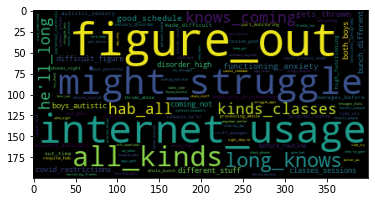

In [62]:
#Topic 0
plt.imshow(WordCloud().fit_words(dict(lda_model.show_topic(0, 200))))

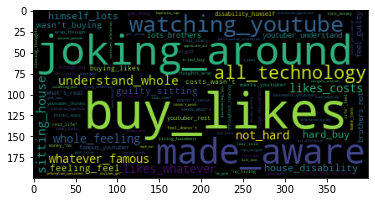

In [63]:
#Topic 1
plt.imshow(WordCloud().fit_words(dict(lda_model.show_topic(1, 200))))

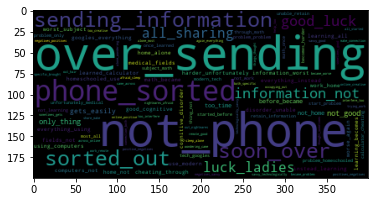

In [64]:
#Topic 2
plt.imshow(WordCloud().fit_words(dict(lda_model.show_topic(2, 200))))

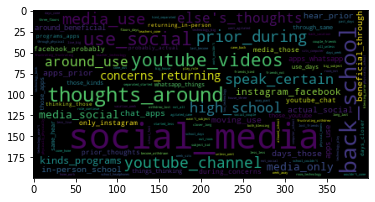

In [65]:
#Topic 3
plt.imshow(WordCloud().fit_words(dict(lda_model.show_topic(3, 200))))

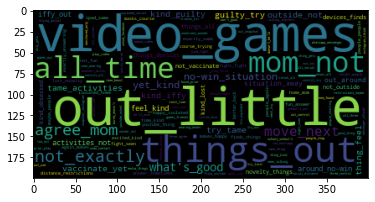

In [66]:
#Topic 4
plt.imshow(WordCloud().fit_words(dict(lda_model.show_topic(4, 200))))

In [67]:
coherence_model_lda=CoherenceModel(model=lda_model, texts=bigram_tokens, dictionary=id2word, coherence='c_v')
coherence_model_lda.get_coherence()

0.5635575662854083

[t-SNE] Computing 72 nearest neighbors...
[t-SNE] Indexed 73 samples in 0.000s...
[t-SNE] Computed neighbors for 73 samples in 0.002s...
[t-SNE] Computed conditional probabilities for sample 73 / 73
[t-SNE] Mean sigma: 0.226203
[t-SNE] KL divergence after 250 iterations with early exaggeration: 50.423466
[t-SNE] KL divergence after 1000 iterations: 0.218962


Loading BokehJS ...

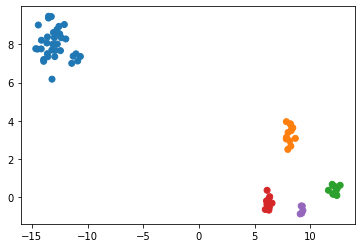

In [68]:
getTopicClusters(lda_model, corpus)

In [69]:
vis = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary=lda_model.id2word)
vis

C:\Users\Administrator\AppData\Roaming\Python\Python38\site-packages\pyLDAvis\_prepare.py:228: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info  = pd.DataFrame({'saliency': saliency, 'Term': vocab, \


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.084275  0.085225       1        1  22.519663
4     -0.007803 -0.038844       2        1  21.454137
3     -0.012840 -0.016710       3        1  20.218571
1      0.134205  0.035450       4        1  19.663207
2     -0.029287 -0.065121       5        1  16.144422, topic_info=                       Term      Freq   Total Category  logprob  loglift
702            social_media  7.000000  7.0000  Default  30.0000  30.0000
1312        information_not  5.000000  5.0000  Default  29.0000  29.0000
1314           over_sending  5.000000  5.0000  Default  28.0000  28.0000
1313              not_phone  5.000000  5.0000  Default  27.0000  27.0000
1318             sorted_out  5.000000  5.0000  Default  26.0000  26.0000
...                     ...       ...     ...      ...      ...      ...
425              use_modern  0.258019  0.7417   Topic5  -6.7689   0.7677
427               work_home  0.258019  0.7417   Topic5  -6.7689   0.7677
424   unfortunately_medical  0.258019  0.7417   Topic5  -6.7689   0.7677
423           unable_retain  0.258019  0.7417   Topic5  -6.7689   0.7677
426         using_computers  0.258019  0.7417   Topic5  -6.7689   0.7677

[250 rows x 6 columns], token_table=      Topic      Freq                 Term
term                                      
1241      4  0.709518           "no_living
1039      1  0.777339    [program]_respite
829       2  0.895647       activities_not
796       2  0.609400            agree_mom
1040      1  0.777339            all_kinds
...     ...       ...                  ...
675       3  0.691381      youtube_channel
657       3  0.504750       youtube_videos
1256      4  0.709518        youtuber_rest
1257      4  0.709518      youtuber_thinks
1282      4  0.709504  youtuber_understand

[150 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 5, 4, 2, 3])

In [70]:
df=pd.DataFrame(final_lines,columns=['final_lines'])
df['clean_text']=df['final_lines'].apply(preprocessText)
sid = SentimentIntensityAnalyzer()
df['scores'] = df['clean_text'].apply(lambda review: sid.polarity_scores(review))
df['compound']  = df['scores'].apply(lambda score_dict: score_dict['compound'])
final=df.query("compound!=0")
final['comp_score'] = final['compound'].apply(lambda c: 'pos' if c >=0 else 'neg')
final['is_positive'] = final['comp_score'].apply(lambda c: 1 if c =='pos' else 0)

C:\Users\ADMINI~1\AppData\Local\Temp\2/ipykernel_5924/2397249490.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final['comp_score'] = final['compound'].apply(lambda c: 'pos' if c >=0 else 'neg')
C:\Users\ADMINI~1\AppData\Local\Temp\2/ipykernel_5924/2397249490.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final['is_positive'] = final['comp_score'].apply(lambda c: 1 if c =='pos' else 0)


<AxesSubplot:ylabel='Frequency'>

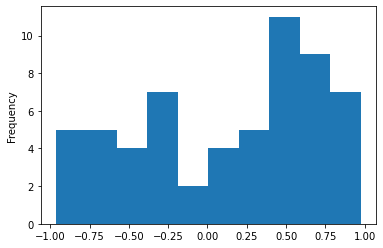

In [71]:
final['compound'].plot(kind = 'hist')

<AxesSubplot:>

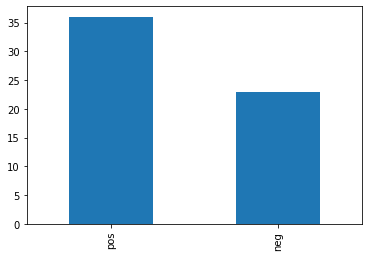

In [72]:
final['comp_score'].value_counts().plot(kind = 'bar')

### Key Observations

In [ ]:
#Key themes
#Social Groups 1 - more time at hand,lock down,social media and online games
#Social Groups 2 - social life restrictions, lockdown,time spent on phone,social media
#Social Groups 3 - Remote working and schooling, anxiety, social life restrictions, struggles
#Social Groups 4 - technology use, time spent online, video games

In [ ]:
#Sentiment Analysis
#Social Groups 1 - neutral
#Social Groups 2, 3, 4 - Moderately negative